In [1]:
#Libraries
import os
import numpy as np
from scipy.spatial import distance
import matplotlib.pyplot as plt

In [2]:
#Class
cls_label = ['apple','bat','beetle','bell','bird','bone','bottle','brick','butterfly','camel','car','carriage',
'cattle','cellular_phone','chicken','children','chopper','classic','Comma','crown','cup','deer','device0',
'device1','device2','device3','device4','device5','device6','device7','device8','device9','dog', 'elephant',
'face','fish','flatfish','fly','fork','fountain','frog','glas','guitar','hammer','hat','hcircle','heart',
'horse','horseshoe','jar','key','lizzard','lmfish','misk','octopus','pencil','personal_car','pocket','rat',
'ray','sea_snake','shoe','spoon','spring','stef','teddy','tree','truck','turtle','watch' ]

#Rank
cantidad = 1400

In [3]:
#Load Data in formart .txt
def Load_data(dataset_dir):
    image_filenames = [f for f in os.listdir(dataset_dir) if f.endswith(".txt")]
    image_filenames.sort()
    nimages = len(image_filenames)
    dataset_shape = []
    cls_shape = []
    i = 0
    current_index = 0
    for image_filename in image_filenames:
        arr_filename = image_filename.split('-')
        for index, item in enumerate(cls_label):
            if item == arr_filename[0]:
                cls = index        
        image_path = dataset_dir + image_filename
        with open(image_path, 'r') as file:
            data = file.read().replace('\n', ' ').split()
        
        results = [float(i) for i in data]
        dataset_shape.append(results)
        cls_shape.append(cls)
        current_index += 1
    return dataset_shape, cls_shape

In [4]:
#Matrix of distance between images; using euclidean distance
def Matrix_of_distances(cls_shape,dataset_shape):
    matrix_distances = np.zeros((len(cls_shape), len(cls_shape)))
    for i in range(len(matrix_distances)):
        for j in range(len(matrix_distances[i])):
            matrix_distances[i][j] = distance.euclidean(dataset_shape[i], dataset_shape[j])
    return matrix_distances

In [5]:
#Sorting distance and only get index
def Matrix_sort_by_index(matrix_distances,cls_shape):
    x_ordenada = np.sort(matrix_distances)
    x = np.argsort(matrix_distances)
    lbl = np.zeros((len(cls_shape), len(cls_shape))).astype(int)
    for i in range(len(lbl)):
        for j in range(len(lbl[i])):
            lbl[i][j] = (x[i][j]/20)
    return lbl

In [6]:
#Retrival the 'i' first images
def fncion(value, lista):
    ppp= []
    contad = 0
    rrr = []
    c = 1
    for s in lista:        
        if value == s:
            contad+=1
        ppp.append(contad/c)
        rrr.append(contad/20)
        c +=1
    return ppp,rrr

In [7]:
#get Matrix of Precision and Recall
def Compute_distance(cantidad,lbl,cls_shape):
    pr = []
    precision = []
    recall = []
    p1 = []
    r1 = []
    contador = 0
    matrix_precision = np.zeros((len(cls_shape), cantidad))
    matrix_recall = np.zeros((len(cls_shape), cantidad))
    for sublist in lbl:
        pr.append(sublist[:cantidad])
    lst = np.array(pr).tolist()
    for index,valor in enumerate(cls_shape):
        p1, r1 = fncion(valor, lst[index])        
        for i in range(cantidad):
            matrix_precision[index][i] = p1[i]
            matrix_recall[index][i] = r1[i]
            
    media_matrix_precision = [sum([row[i] for row in matrix_precision])/1400 for i in range(0,len(matrix_precision[0]))]
    media_matrix_recall = [sum([row[i] for row in matrix_recall])/1400 for i in range(0,len(matrix_recall[0]))]  
    
    return media_matrix_precision,media_matrix_recall

In [11]:
#Visualization
def Plot_Precision_x_Recall(matrix_precision_1,matrix_recall_1,matrix_precision_2,matrix_recall_2):
    plt.plot(matrix_precision_1,matrix_recall_1, label='Extracting Multiscale Fractal Dimension ')
    plt.plot(matrix_precision_2,matrix_recall_2, label='Extracting Segment Saliences ')
    plt.axis([0, 1, 0, 1])
    plt.legend()
    plt.show()

In [9]:
##############################################################
##############################################################
##############################################################
##############################################################
###########Extracting Multiscale Fractal Dimension ###########
##############################################################
##############################################################
##############################################################
##############################################################
#Path to .txt of 
dataset_dir_Fractal = 'mpeg7_Fractal/'
#features and class
dataset_shape_Fractal = []
cls_shape_Fractal = []
#load Data
dataset_shape_Fractal, cls_shape_Fractal = Load_data(dataset_dir_Fractal)
#Matrix of distances
matrix_distances_Fractal = np.zeros((len(cls_shape_Fractal), len(cls_shape_Fractal)))
#Sorting distance and only get index 
lbl_Fractal = np.zeros((len(cls_shape_Fractal), len(cls_shape_Fractal))).astype(int)
#Get Distances between images
matrix_distances_Fractal = Matrix_of_distances(cls_shape_Fractal,dataset_shape_Fractal)
#label of Matrix sorting by index
lbl_Fractal = Matrix_sort_by_index(matrix_distances_Fractal,cls_shape_Fractal)
#Precision and Recall
matrix_precision_Fractal,matrix_recall_Fractal = Compute_distance(cantidad,lbl_Fractal,cls_shape_Fractal)

In [10]:
##############################################################
##############################################################
##############################################################
##############################################################
############## Extracting Segment Saliences ##################
##############################################################
##############################################################
##############################################################
##############################################################
#Path to .txt of 
dataset_dir_Saliences = 'mpeg7_Saliences/'
#features and class
dataset_shape_Saliences = []
cls_shape_Saliences = []
#load Data
dataset_shape_Saliences, cls_shape_Saliences = Load_data(dataset_dir_Saliences)
#Matrix of distances
matrix_distances_Saliences = np.zeros((len(cls_shape_Saliences), len(cls_shape_Saliences)))
#Sorting distance and only get index 
lbl_Saliences = np.zeros((len(cls_shape_Saliences), len(cls_shape_Saliences))).astype(int)
#Get Distances between images
matrix_distances_Saliences = Matrix_of_distances(cls_shape_Saliences,dataset_shape_Saliences)
#label of Matrix sorting by index
lbl_Saliences = Matrix_sort_by_index(matrix_distances_Saliences,cls_shape_Saliences)
#Precision and Recall
matrix_precision_Saliences,matrix_recall_Saliences = Compute_distance(cantidad,lbl_Saliences,cls_shape_Saliences)

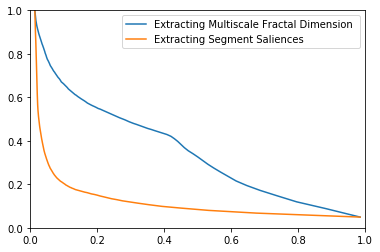

In [12]:
##############################################################
################## Precision_x_Recall ########################
##############################################################

Plot_Precision_x_Recall(matrix_precision_Fractal,matrix_recall_Fractal,matrix_precision_Saliences,matrix_recall_Saliences)